# Perceptron Trick 
- Perceptron Trick are used to saperate the 2 class.
- In this we can start with random value and move the line based on it class.
- if point as classify correctly we can't move the line other wise we can move in this way point are classify correctly.

# Formula (Logistic Regression)
- `Ax + By +C=0`

# Generate Dataset

In [298]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_classification(n_samples=1000,   # Number of samples
                           n_features=2,     # Number of features (inputs)
                           n_informative=1,  # Number of informative features
                           n_redundant=0,    # Number of redundant features
                           n_classes=2,      # Number of classes (output)
                           n_clusters_per_class=1,
                           hypercube=False,class_sep=5,
                           random_state=42)

# Create a DataFrame with the input features and output
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['output'] = y

In [299]:
df.head(3)

,feature1,feature2,output
0,-1.356057,-1.237821,0
1,3.485901,0.030162,1
2,-1.212371,-2.525719,0


In [300]:
df['output'].value_counts()

output
1    502
0    498
Name: count, dtype: int64

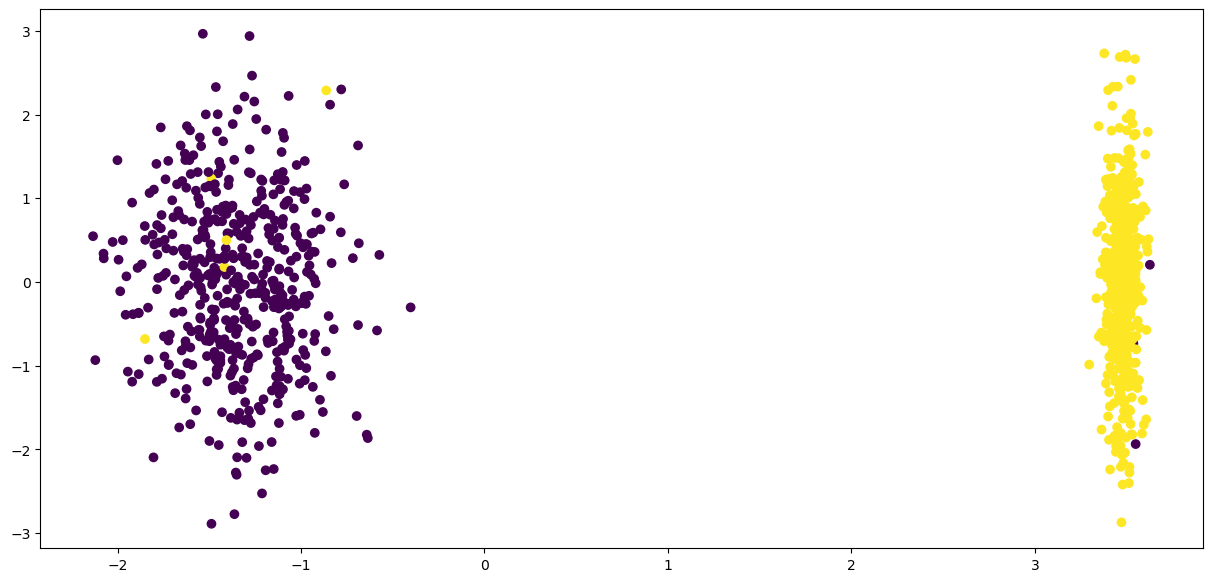

In [301]:
plt.figure(figsize=(15,7))
plt.scatter(df['feature1'],df['feature2'],c=df['output'])
plt.show()

**Now we can saperate the each class using percetron trick**

In [302]:
def step(z):
        return 0 if z<0 else 1
def perceotron(x_train,y_train,epoc=1000,learning_rate=0.01):
    # Insert 1 at index 0 
    x_train=np.insert(x_train,0,1,axis=1)
    
    # Weights
    weights=np.ones(x_train.shape[1])
    
    
    for i in range(epoc):
        # Select the random point
        r_point=np.random.randint(x_train.shape[0])
        
        
        x_random=x_train[r_point]
        y_random=y_train[r_point]
        
        z=np.dot(weights,x_random)
        
        
        y_pred=step(z=z)
        
        weights+=learning_rate*(y_random-y_pred)*x_random
        
    return weights[0],weights[1:]

In [303]:
intercept,coffi=perceotron(X,y,epoc=7000,learning_rate=0.01)
intercept

0.3499999999999994

In [304]:
coffi

array([0.69368637, 0.13564224])

In [305]:
m=-(coffi[0]/coffi[1])
b=-(intercept/coffi[1])

In [306]:
m

-5.114088149899187

In [307]:
b

-2.5803171606265893

In [308]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input + b

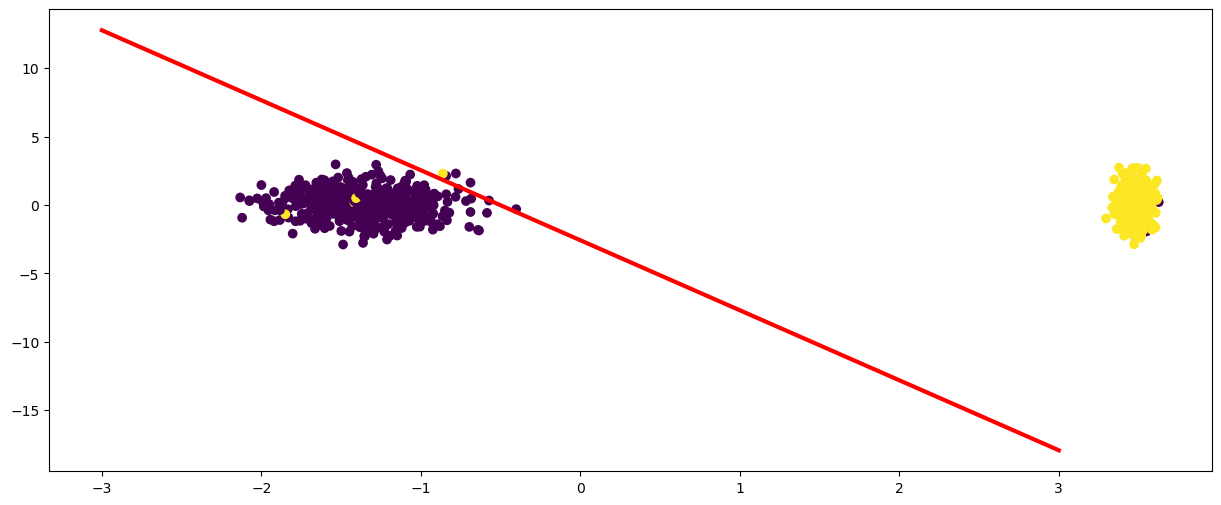

In [309]:
plt.figure(figsize=(15,6))
plt.plot(x_input,y_input,c='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y)